Import All Necessary Libaries:

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


Read Data:

In [6]:
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Python/asiacupdata.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Srilanka,ODI,Sharjah,1984,Lose,Batting,187,9,9,3,21,4.06,52.04,47,5,26,2,Roy Dias,Lose
1,Srilanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190,5,11,1,26,4.36,68.51,57,9,21,3,Roy Dias,Win
2,India,Srilanka,ODI,Sharjah,1984,Win,Bowling,97,0,9,0,14,4.47,60.48,51,10,8,3,Surinder Khanna,Win
3,Srilanka,India,ODI,Sharjah,1984,Lose,Batting,96,10,7,0,8,2.34,25.74,38,0,14,0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188,4,13,3,17,4.08,60.21,56,10,5,3,Surinder Khanna,Win


Drop The Unnecessary Coloum:

In [7]:
# Drop the Format, Year, and Player Of The Match columns
df1 = df.drop(["Format", "Year", "Player Of The Match"], axis=1)

# Check for missing values
print("Number of missing values in the Run Scored column:", df1.isnull().sum())

Number of missing values in the Run Scored column: Team                         0
Opponent                     0
Ground                       0
Toss                         0
Selection                    0
Run Scored                   0
Wicket Lost                  0
Fours                        0
Sixes                        0
Extras                       0
Run Rate                     0
Avg Bat Strike Rate          0
Highest Score                0
Wicket Taken                 0
Given Extras                 0
Highest Individual wicket    0
Result                       0
dtype: int64


Summary of the DataFrame:

In [8]:
# check the df structer
df1.info()

# describe df numerical columns
df1.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       224 non-null    object 
 1   Opponent                   224 non-null    object 
 2   Ground                     224 non-null    object 
 3   Toss                       224 non-null    object 
 4   Selection                  224 non-null    object 
 5   Run Scored                 224 non-null    int64  
 6   Wicket Lost                224 non-null    int64  
 7   Fours                      224 non-null    int64  
 8   Sixes                      224 non-null    int64  
 9   Extras                     224 non-null    int64  
 10  Run Rate                   224 non-null    float64
 11  Avg Bat Strike Rate        224 non-null    float64
 12  Highest Score              224 non-null    int64  
 13  Wicket Taken               224 non-null    int64  

,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,207.433036,6.946429,16.116071,2.566964,13.808036,5.008304,72.707500,70.950893,6.946429,13.808036,2.571429
std,67.686133,2.895301,7.950233,2.366617,7.741550,1.273403,26.938565,29.969974,2.895301,7.741550,1.110200
min,81.000000,0.000000,0.000000,0.000000,0.000000,2.200000,24.630000,20.000000,0.000000,0.000000,0.000000
25%,151.750000,5.000000,10.000000,1.000000,8.000000,4.080000,53.095000,48.000000,5.000000,8.000000,2.000000
50%,204.500000,8.000000,15.000000,2.000000,13.000000,4.930000,70.635000,68.500000,8.000000,13.000000,3.000000
75%,258.250000,10.000000,21.000000,4.000000,18.000000,5.800000,88.215000,90.000000,10.000000,18.000000,3.000000
max,385.000000,10.000000,41.000000,14.000000,38.000000,8.810000,159.030000,183.000000,10.000000,38.000000,6.000000


Data Processing:

In [9]:
#Replace missing values with the mean value

df1["Run Scored"].fillna(df1["Run Scored"].mean(), inplace=True)
df1["Wicket Lost"].fillna(df1["Wicket Lost"].mean(), inplace=True)
df1["Fours"].fillna(df1["Fours"].mean(), inplace=True)
df1["Sixes"].fillna(df1["Sixes"].mean(), inplace=True)
df1["Extras"].fillna(df1["Extras"].mean(), inplace=True)
df1["Run Rate"].fillna(df1["Run Rate"].mean(), inplace=True)
df1["Avg Bat Strike Rate"].fillna(df1["Avg Bat Strike Rate"].mean(), inplace=True)
df1["Highest Score"].fillna(df1["Highest Score"].mean(), inplace=True)
df1["Wicket Taken"].fillna(df1["Wicket Taken"].mean(), inplace=True)
df1["Given Extras"].fillna(df1["Given Extras"].mean(), inplace=True)
df1["Highest Individual wicket"].fillna(df1["Highest Individual wicket"].mean(), inplace=True)


print("Number of missing values in the Run Scored column:", df1.isnull().sum())


Number of missing values in the Run Scored column: Team                         0
Opponent                     0
Ground                       0
Toss                         0
Selection                    0
Run Scored                   0
Wicket Lost                  0
Fours                        0
Sixes                        0
Extras                       0
Run Rate                     0
Avg Bat Strike Rate          0
Highest Score                0
Wicket Taken                 0
Given Extras                 0
Highest Individual wicket    0
Result                       0
dtype: int64


Check The Shape of DataFrame:

In [10]:
df1.shape

(224, 17)

Check The object of DataFrame:

In [11]:
for col in df1.select_dtypes(include='object').columns:
    print(col)
    print(df1[col].unique())

Team
['Pakistan' 'Srilanka' 'India' 'Bangladesh' 'Hong Kong' 'UAE'
 'Afghanistan']
Opponent
['Srilanka' 'Pakistan' 'India' 'Bangladesh' 'Hong Kong' 'UAE'
 'Afghanistan' 'Sri Lanka']
Ground
['Sharjah' 'Colombo(PSS)' 'Moratuwa' 'Kandy' 'Colombo(SSC)' 'Dhaka'
 'Chattogram' 'Chandigarh' 'Cuttack' 'Kolkata' 'Colombo(RPS)' 'Dambulla'
 'Lahore' 'Karachi' 'Mirpur' 'Fatullah' 'Dubai(DSC)' 'Abu Dhabi']
Toss
['Lose' 'Win']
Selection
['Batting' 'Bowling']
Result
['Lose' 'Win' ' Win ' ' Lose ']


Check The number of unique value in coloum:

In [12]:
for column in df.columns:
    print(column,df[column].nunique())

Team 7
Opponent 8
Format 2
Ground 18
Year 15
Toss 2
Selection 2
Run Scored 156
Wicket Lost 11
Fours 36
Sixes 13
Extras 33
Run Rate 180
Avg Bat Strike Rate 220
Highest Score 95
Wicket Taken 11
Given Extras 33
Highest Individual wicket 7
Player Of The Match 65
Result 4


Check number of categories for each catagorial feature:

In [14]:
categorical_features=[feature for feature in df1.columns if ((df1[feature].dtypes=='O') & (feature not in ['Result']))]

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Team and number of categories are 7
The feature is Opponent and number of categories are 8
The feature is Ground and number of categories are 18
The feature is Toss and number of categories are 2
The feature is Selection and number of categories are 2


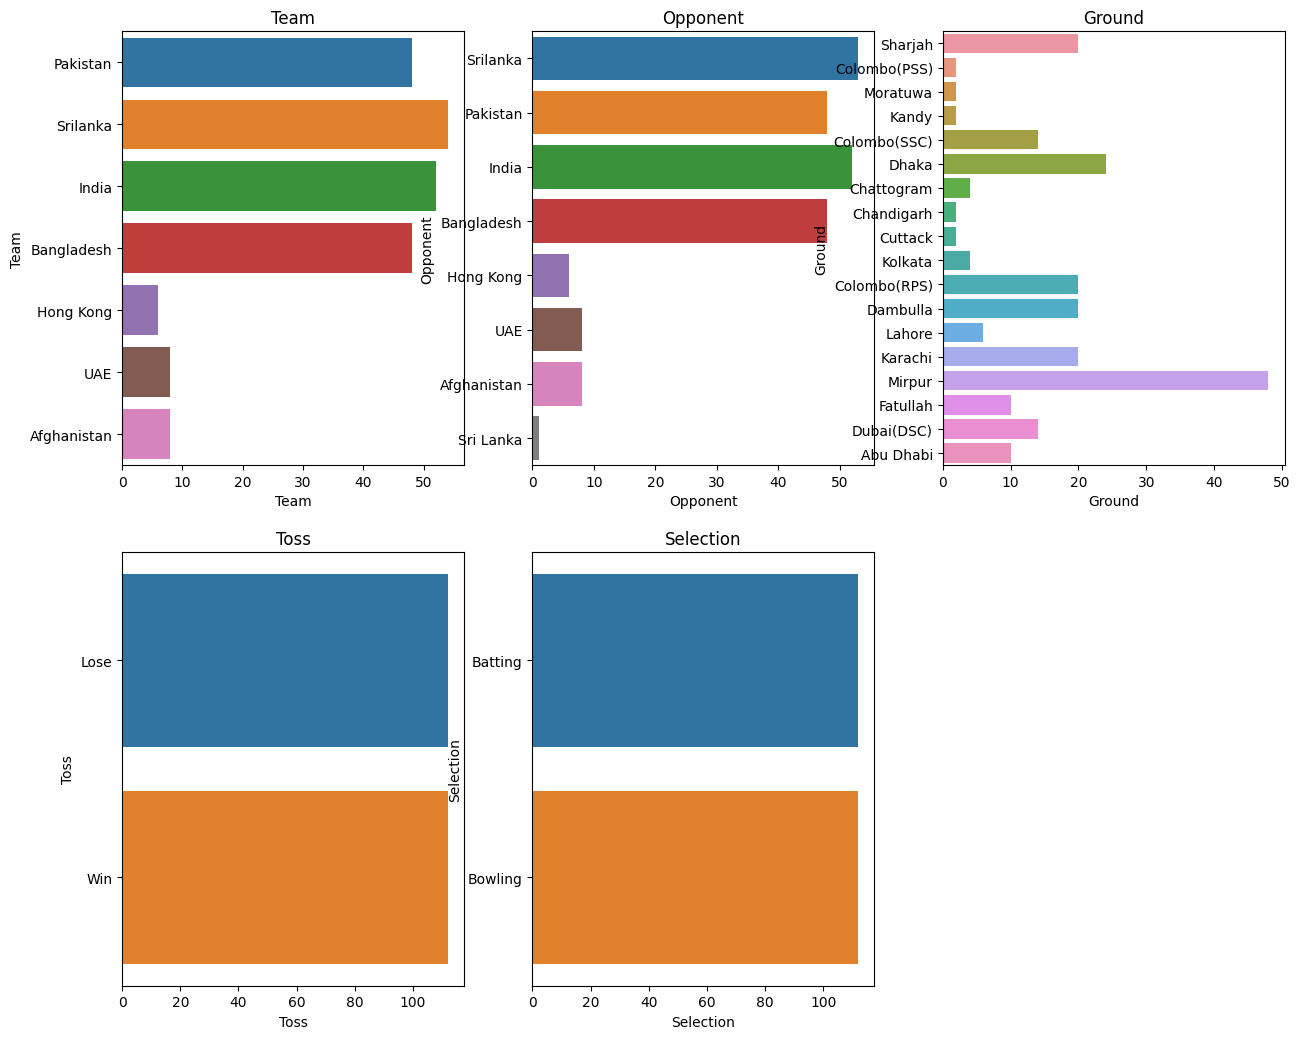

In [16]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

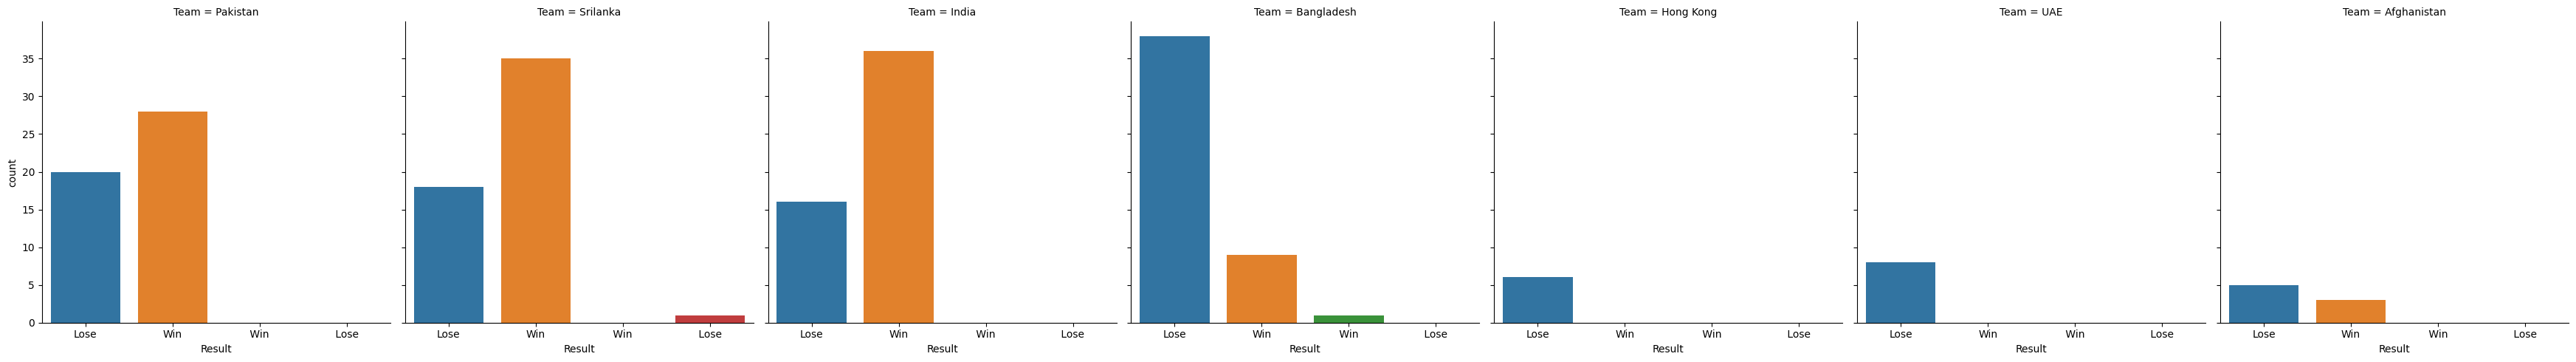

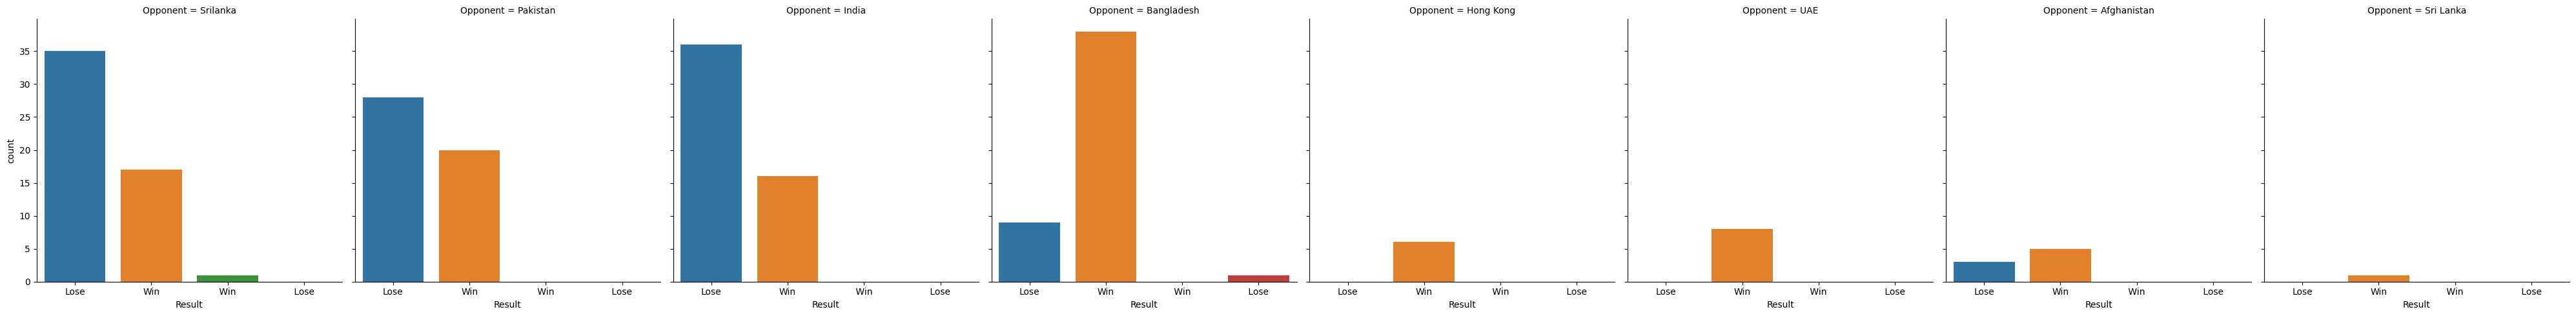

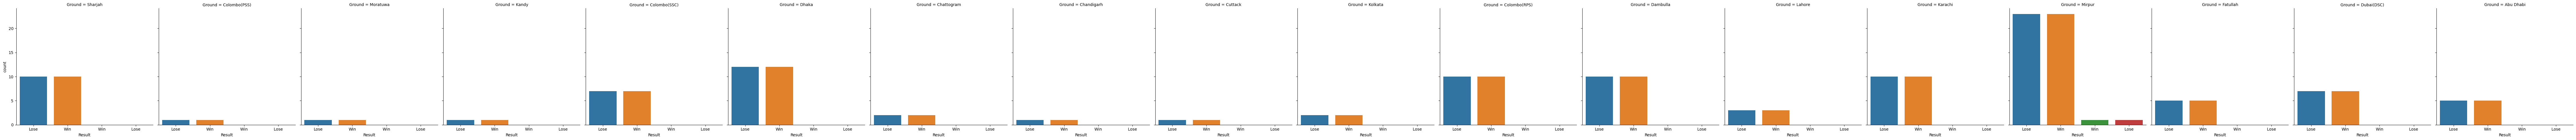

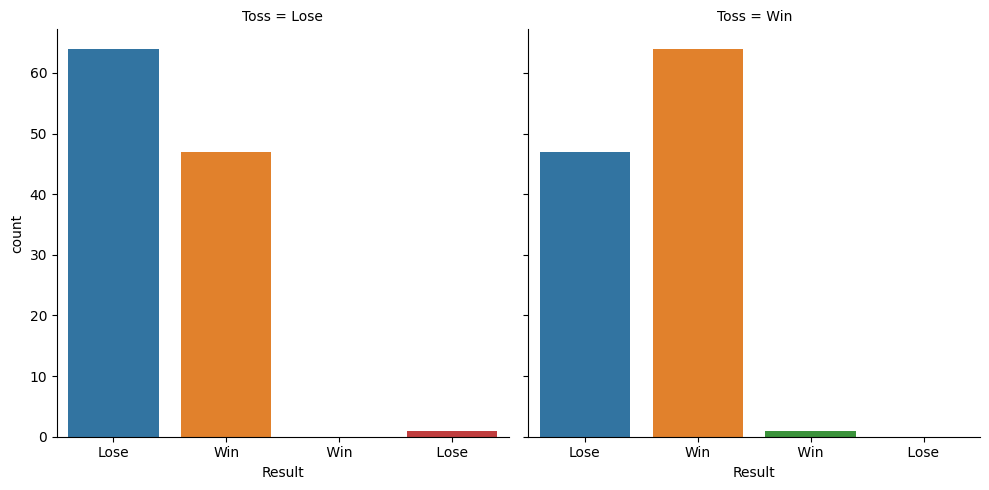

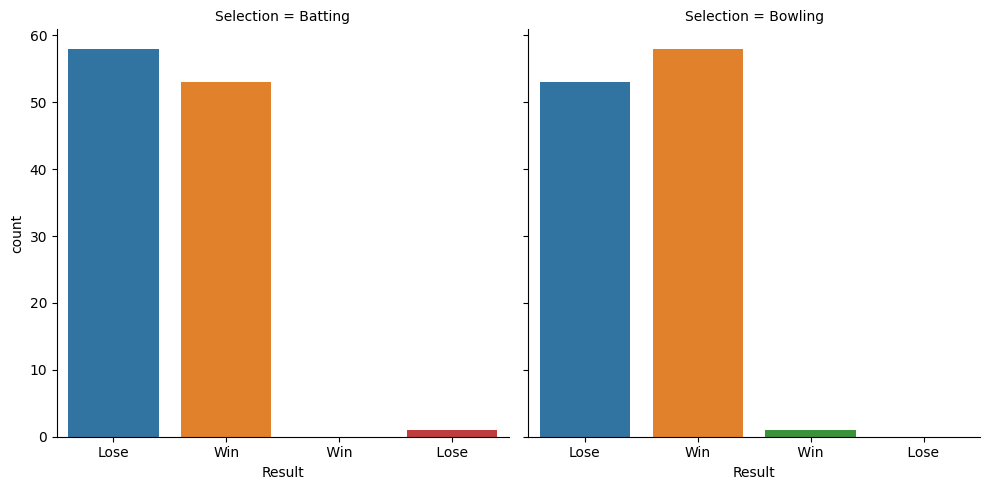

In [17]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='Result', col=categorical_feature, kind='count', data= df)
    plt.show()

Find out size of each group in the DataFrame for target variable:

In [18]:
for categorical_feature in categorical_features:
    print(df.groupby(['Result',categorical_feature]).size())

Result  Team       
 Lose   Srilanka        1
 Win    Bangladesh      1
Lose    Afghanistan     5
        Bangladesh     38
        Hong Kong       6
        India          16
        Pakistan       20
        Srilanka       18
        UAE             8
Win     Afghanistan     3
        Bangladesh      9
        India          36
        Pakistan       28
        Srilanka       35
dtype: int64
Result  Opponent   
 Lose   Bangladesh      1
 Win    Srilanka        1
Lose    Afghanistan     3
        Bangladesh      9
        India          36
        Pakistan       28
        Srilanka       35
Win     Afghanistan     5
        Bangladesh     38
        Hong Kong       6
        India          16
        Pakistan       20
        Sri Lanka       1
        Srilanka       17
        UAE             8
dtype: int64
Result  Ground      
 Lose   Mirpur           1
 Win    Mirpur           1
Lose    Abu Dhabi        5
        Chandigarh       1
        Chattogram       2
        Colombo(PSS)    

list of numerical variables:

In [20]:
numerical_features = [feature for feature in df1.columns if ((df1[feature].dtypes != 'O') & (feature not in ['Result']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  11


,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket
0,187,9,9,3,21,4.06,52.04,47,5,26,2
1,190,5,11,1,26,4.36,68.51,57,9,21,3
2,97,0,9,0,14,4.47,60.48,51,10,8,3
3,96,10,7,0,8,2.34,25.74,38,0,14,0
4,188,4,13,3,17,4.08,60.21,56,10,5,3


Distribution of the numerical_features:

Continuous feature Count 11


<ipython-input-21-379a03e0c6c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-21-379a03e0c6c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-21-379a03e0c6c2>:8: UserWarning: 

`distplot` is a deprecated function 

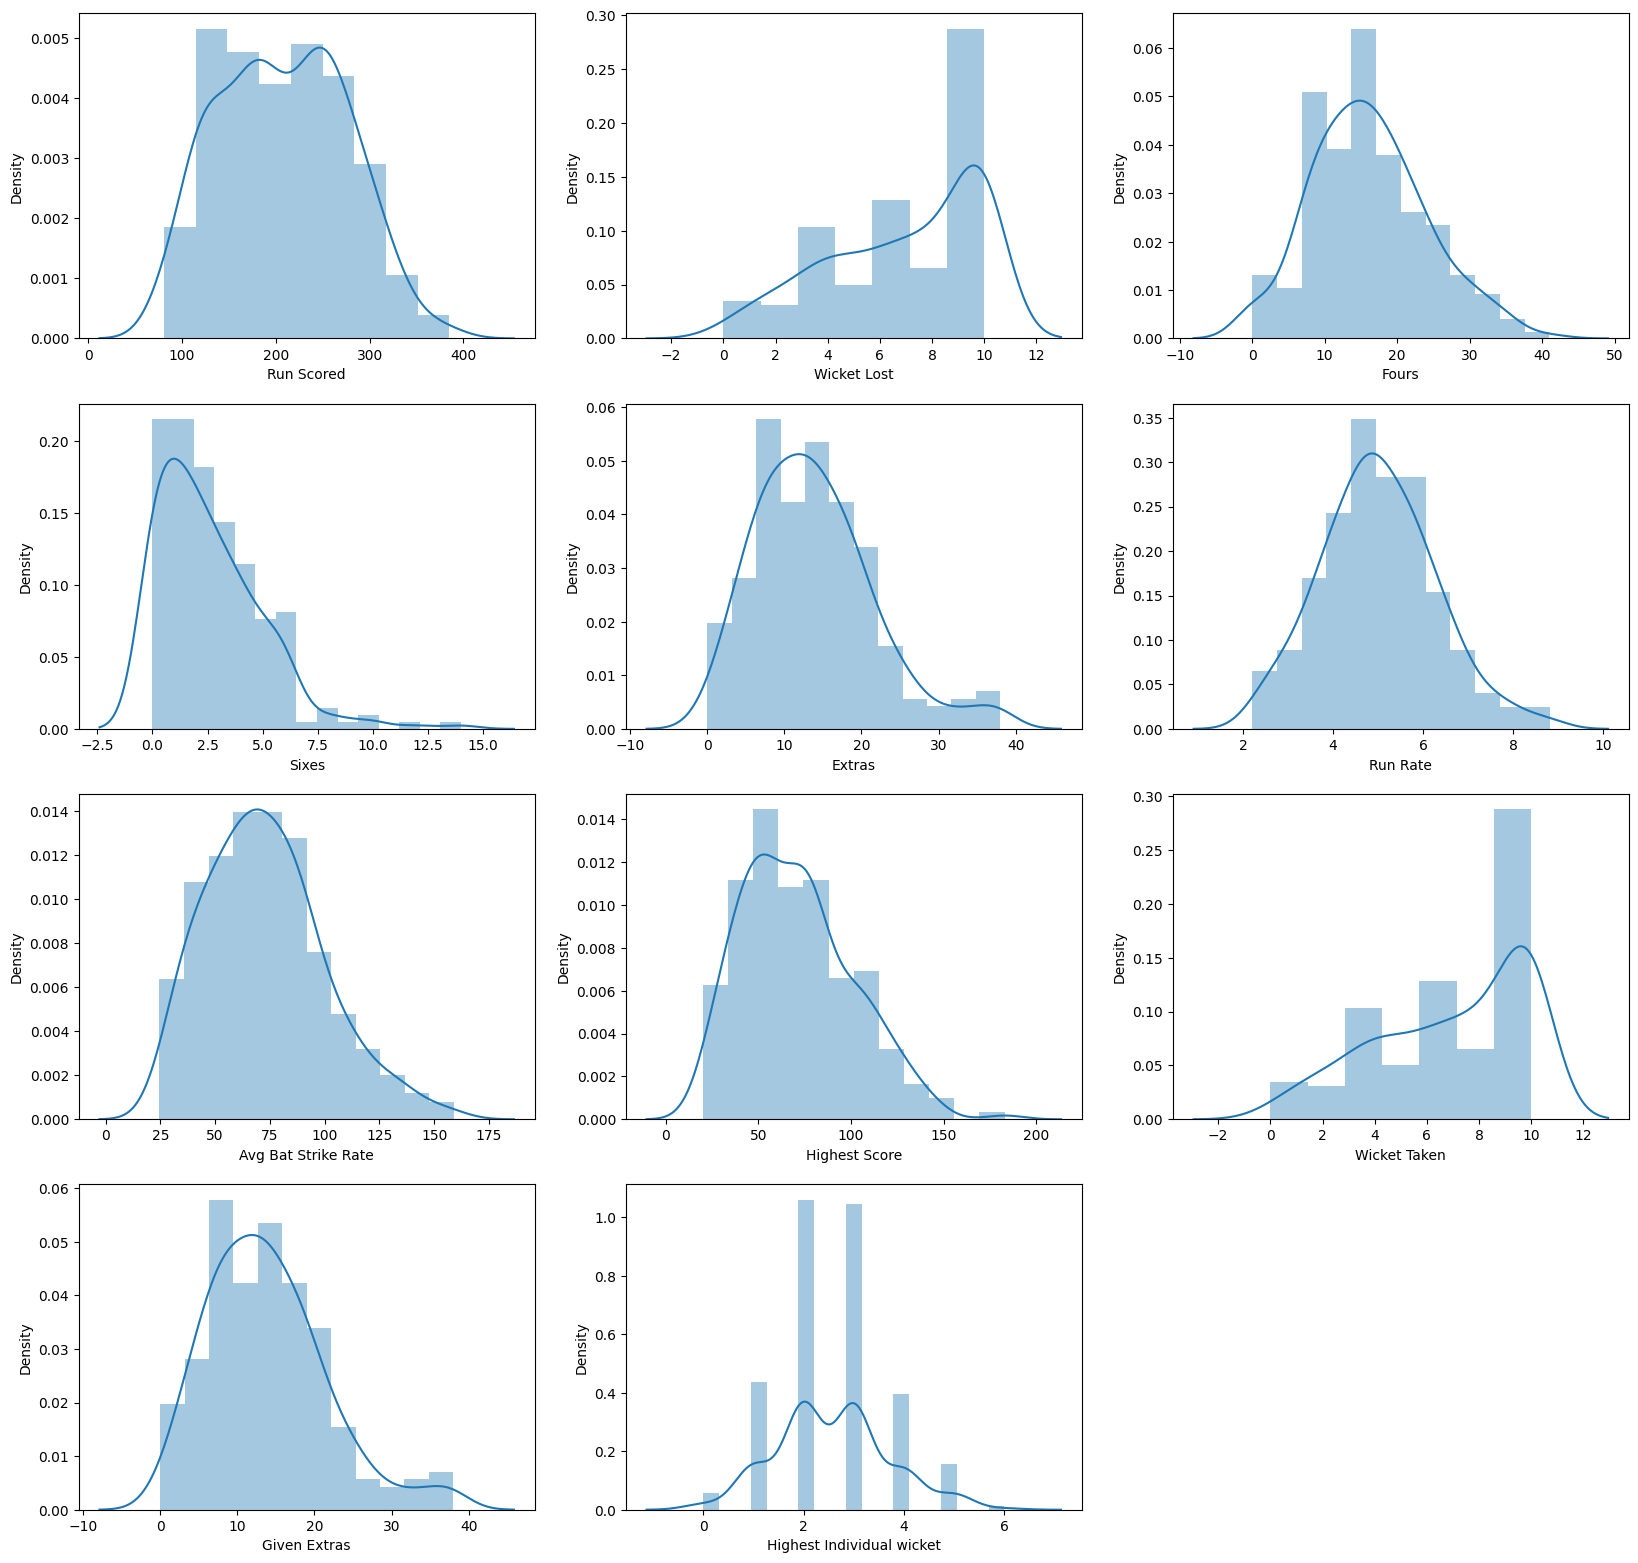

In [21]:
continuous_features=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_features)))

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Boxplot to show target distribution with respect numerical features:

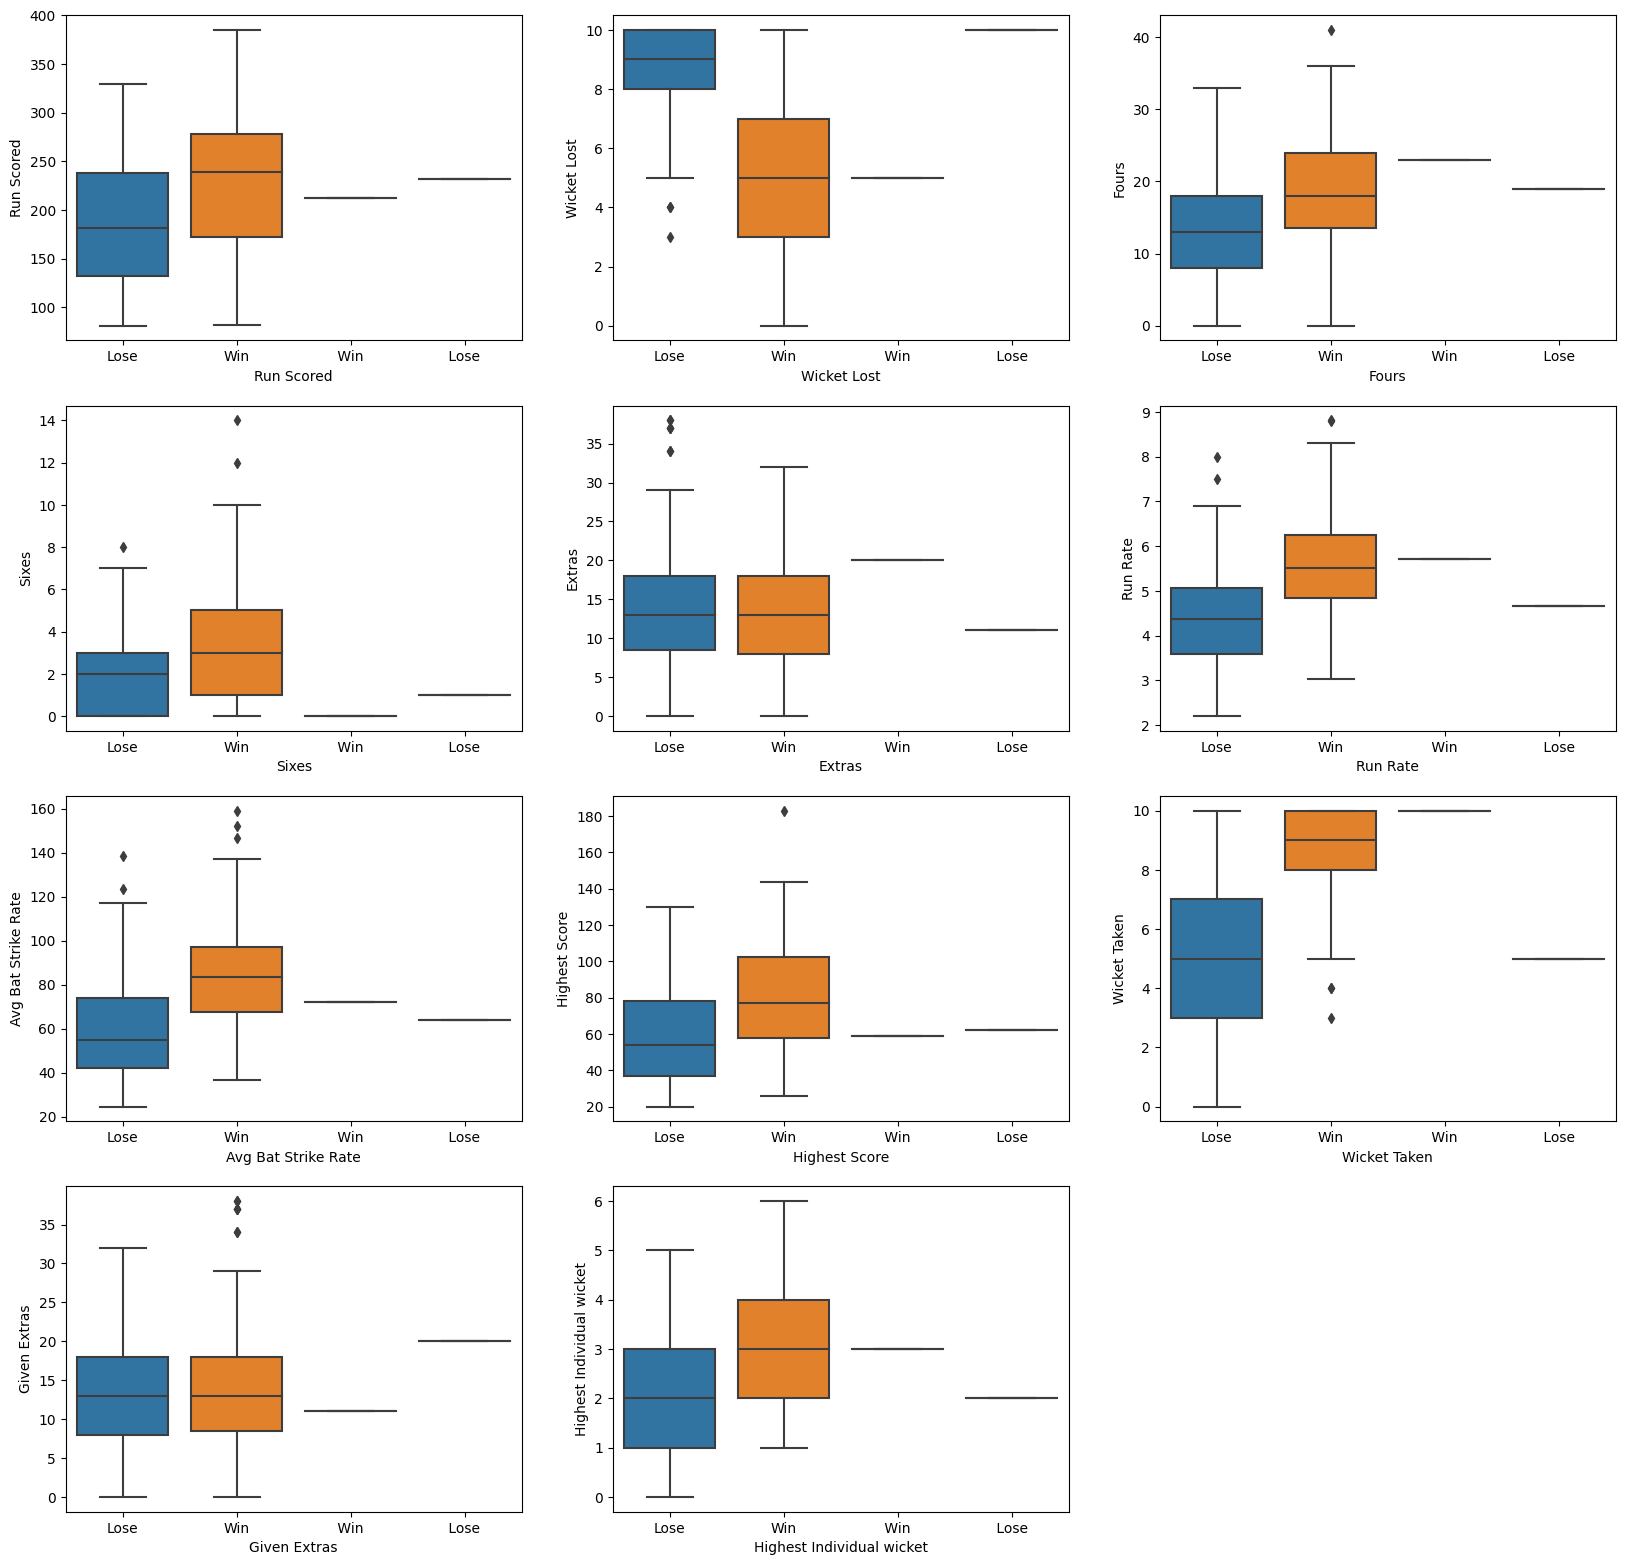

In [22]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Result", y= df1[feature], data=df1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Checking correlation:

<ipython-input-23-b515951dded5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df1.corr()


<Axes: >

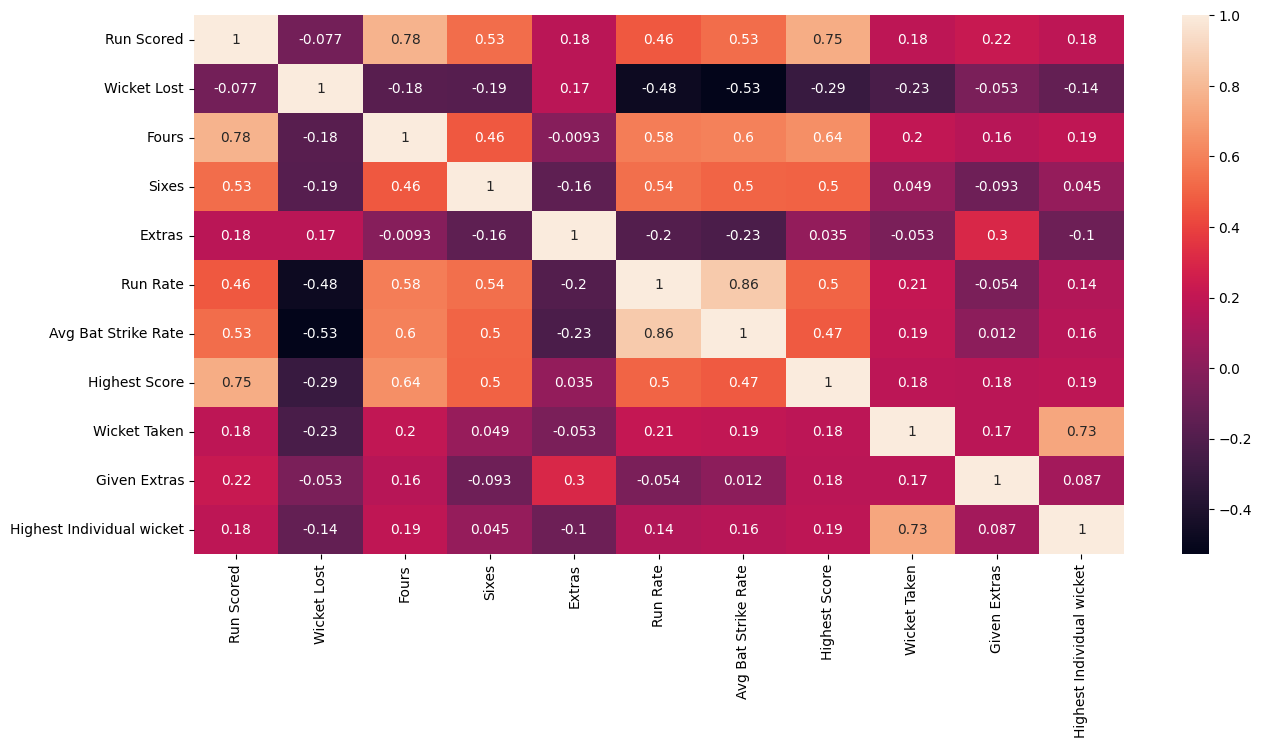

In [23]:
cor_mat=df1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Countplot of the target variable:

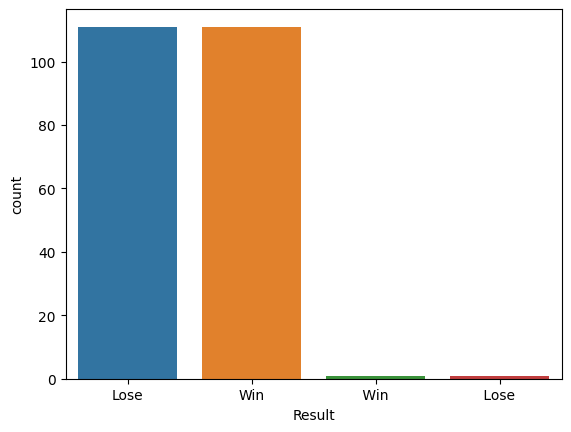

In [27]:
sns.countplot(x='Result',data=df1)
plt.show()

In [28]:
df1['Result'].groupby(df['Result']).count()

Result
 Lose       1
 Win        1
Lose      111
Win       111
Name: Result, dtype: int64

Encode categorical columns using LabelEncoder:

In [29]:
cat_columns = ["Team", "Opponent", "Ground","Selection"]

for col in  cat_columns:

    df1 = pd.concat([df1.drop(col, axis=1),pd.get_dummies(df1[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)


# Save the cleaned data to a new file
df1.to_csv("/content/drive/My Drive/asiacup_cleaned.csv")

# Print the first few rows of the new file
df1.head()

,Toss,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,...,Ground_Dubai(DSC),Ground_Fatullah,Ground_Kandy,Ground_Karachi,Ground_Kolkata,Ground_Lahore,Ground_Mirpur,Ground_Moratuwa,Ground_Sharjah,Selection_Bowling
0,Lose,187,9,9,3,21,4.06,52.04,47,5,...,0,0,0,0,0,0,0,0,1,0
1,Win,190,5,11,1,26,4.36,68.51,57,9,...,0,0,0,0,0,0,0,0,1,1
2,Win,97,0,9,0,14,4.47,60.48,51,10,...,0,0,0,0,0,0,0,0,1,1
3,Lose,96,10,7,0,8,2.34,25.74,38,0,...,0,0,0,0,0,0,0,0,1,0
4,Win,188,4,13,3,17,4.08,60.21,56,10,...,0,0,0,0,0,0,0,0,1,0


In [30]:
bool_columns = ['Toss', 'Result']
for col in  bool_columns:
    df1[col+'_new']=df1[col].apply(lambda x : 1 if x == 'Win' else 0)
    df1.drop(col, axis=1, inplace=True)

In [31]:
df1.head()

,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,...,Ground_Kandy,Ground_Karachi,Ground_Kolkata,Ground_Lahore,Ground_Mirpur,Ground_Moratuwa,Ground_Sharjah,Selection_Bowling,Toss_new,Result_new
0,187,9,9,3,21,4.06,52.04,47,5,26,...,0,0,0,0,0,0,1,0,0,0
1,190,5,11,1,26,4.36,68.51,57,9,21,...,0,0,0,0,0,0,1,1,1,1
2,97,0,9,0,14,4.47,60.48,51,10,8,...,0,0,0,0,0,0,1,1,1,1
3,96,10,7,0,8,2.34,25.74,38,0,14,...,0,0,0,0,0,0,1,0,0,0
4,188,4,13,3,17,4.08,60.21,56,10,5,...,0,0,0,0,0,0,1,0,1,1


Split data:

In [33]:
X = df1.drop(['Result_new'],axis=1)
y = df1['Result_new']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [34]:
len(X_train)

179

In [35]:
len(X_test)

45

Model Train:

RandomForestClassifier:

[0.94444444 0.72222222 0.88888889 0.88888889 0.82857143]
0.8546031746031746


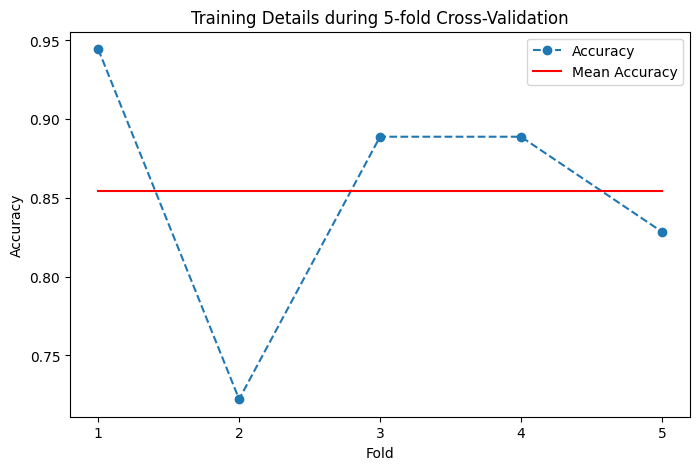

In [57]:
# Create a random forest classifier
model_score = cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
mean_model_score = np.mean(model_score)


print(model_score)
print(mean_model_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

SVC:

[0.88888889 0.86111111 0.88888889 0.88888889 0.8       ]
0.8655555555555555


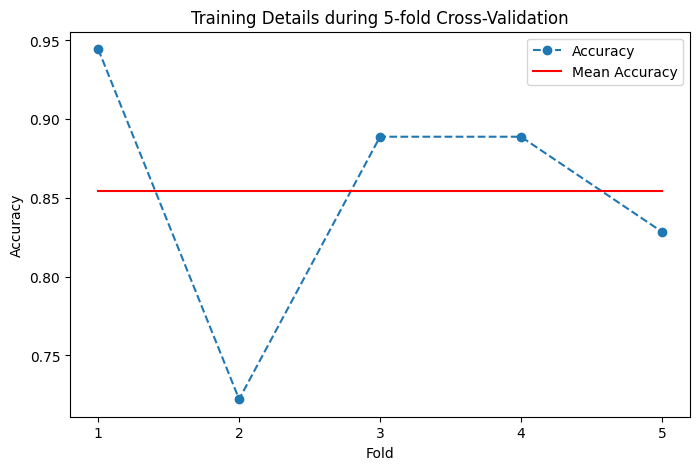

In [58]:
svc = SVC(kernel="linear")
svc_scores = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=5)
svc_mean_score = np.mean(svc_scores)

print(svc_scores)
print(svc_mean_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

DecisionTreeClassifier:

[0.77777778 0.69444444 0.91666667 0.83333333 0.82857143]
0.8101587301587301


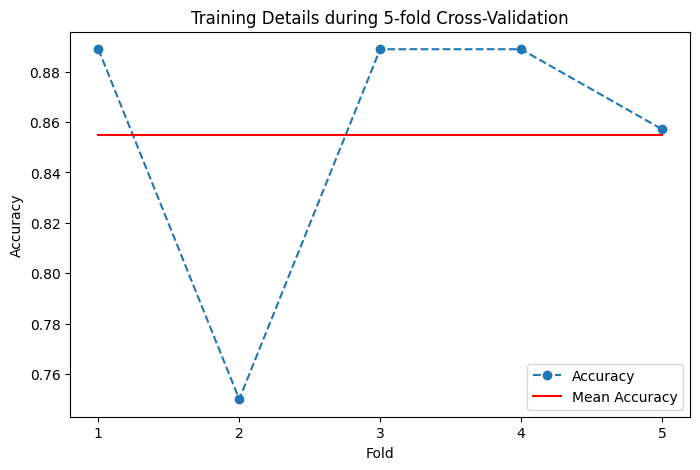

In [55]:
dtc = DecisionTreeClassifier()
dtc_scores = cross_val_score(estimator=dtc, X=X_train, y=y_train, cv=5)
dtc_mean_score = np.mean(dtc_scores)

print(dtc_scores)
print(dtc_mean_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()



Check the Models:

In [40]:
model_param = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'SVC': {
        'model': SVC(),
        'param': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [1, 10, 100],
            'gamma': ['scale', 'auto']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'min_samples_split': [2, 5, 10]
        }
    }
}


GridSearch:

In [41]:
from sklearn.model_selection import GridSearchCV

scores =[]

for model_name, mp in model_param.items():

    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)

    model_selection.fit(X,y)

    scores.append({

        'model': model_name,

        'best_score': model_selection.best_score_,

        'best_params': model_selection.best_params_

    })

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [42]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8524242424242423,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 100}},
 {'model': 'SVC',
  'best_score': 0.8521212121212122,
  'best_params': {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}},
 {'model': 'DecisionTreeClassifier',
  'best_score': 0.8748484848484848,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'min_samples_split': 2}}]

Fit The model:

In [43]:
model_rfc = RandomForestClassifier(criterion= 'entropy',max_depth=3,max_features= 'auto',n_estimators= 100)

In [44]:
model_rfc.fit(X_train,y_train)
model_rfc.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7555555555555555

Feature Importance:

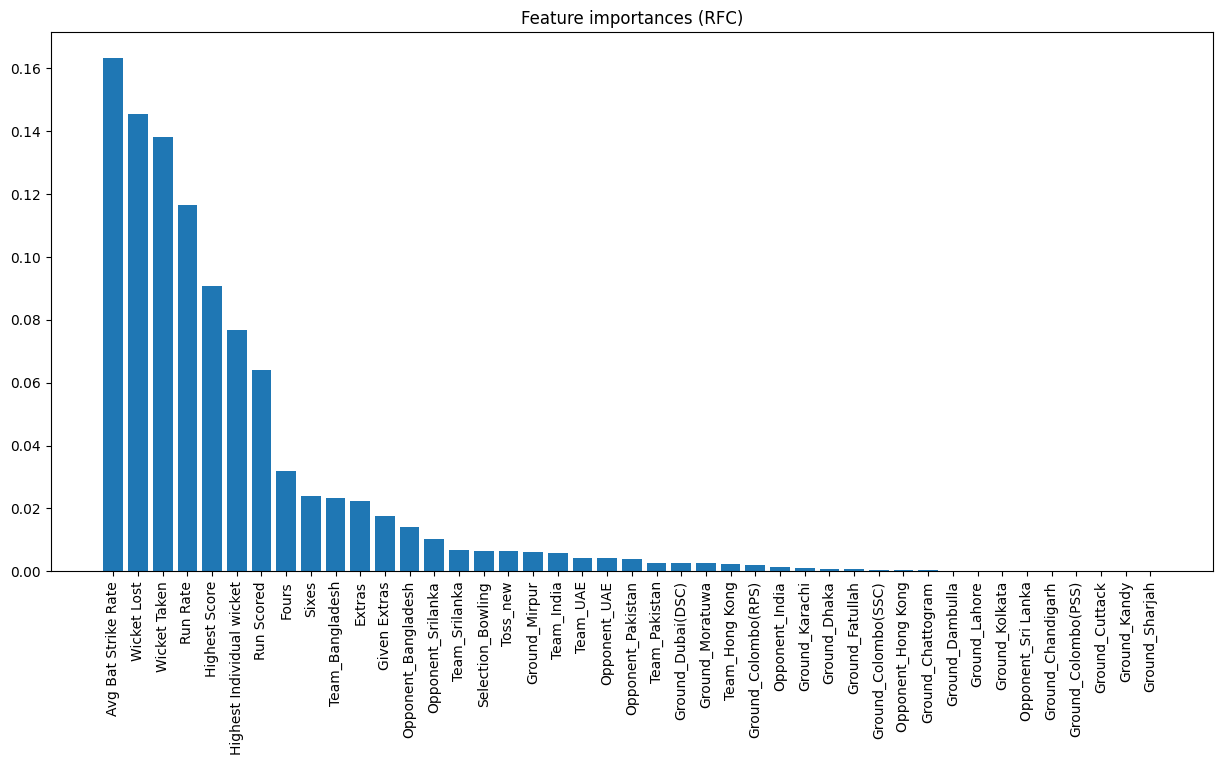

In [45]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_rfc.feature_importances_), key=lambda x: x[1] * -1)
rfc_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rfc_feature_importances))
plt.bar(x_pos, rfc_feature_importances['score'])
plt.xticks(x_pos, rfc_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (RFC)')

plt.show()

Model testing and evaluation:

In [48]:
y_pred = model_rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[13,  9],
       [ 2, 21]])

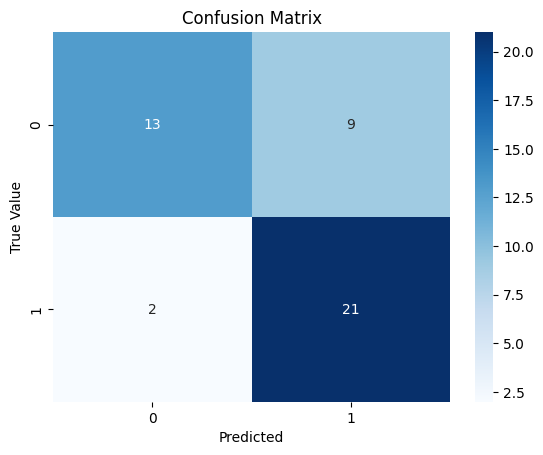

In [49]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

Train-test curves:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

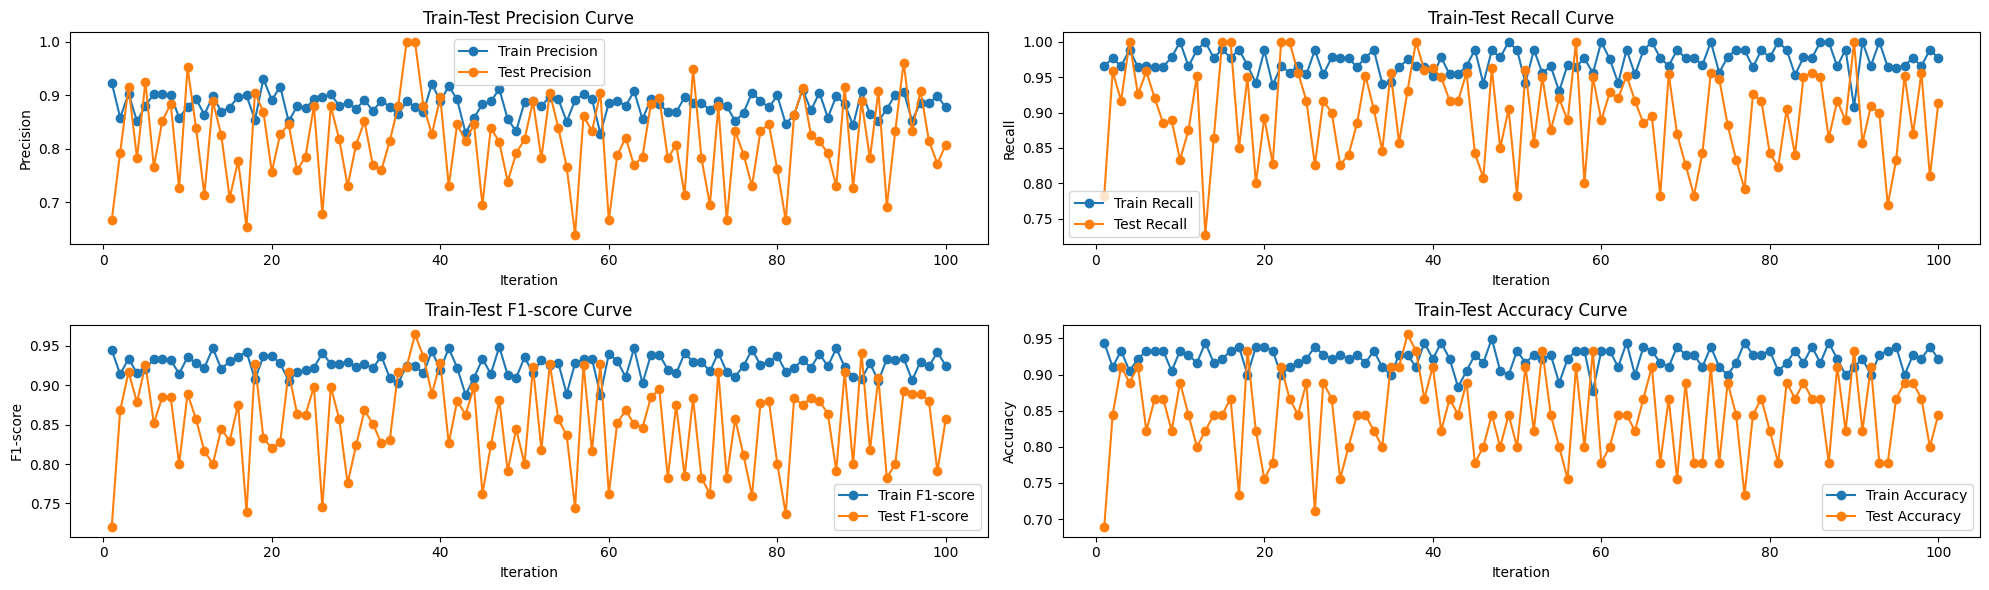

In [50]:

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    model_rfc = RandomForestClassifier(criterion= 'entropy',max_depth=3,max_features= 'auto',n_estimators= 100)
    model_rfc.fit(X_train, y_train)


    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_rfc.predict(X_train)
    y_test_pred = model_rfc.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.8444444444444444
Precision: 0.8076923076923077
Recall: 0.9130434782608695
F1-score: 0.8571428571428572
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.81      0.91      0.86        23

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



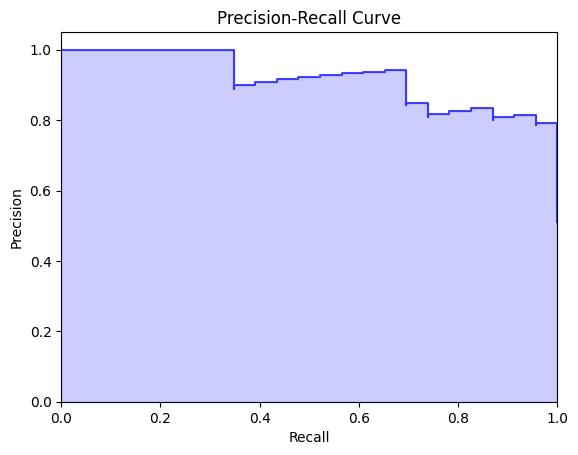

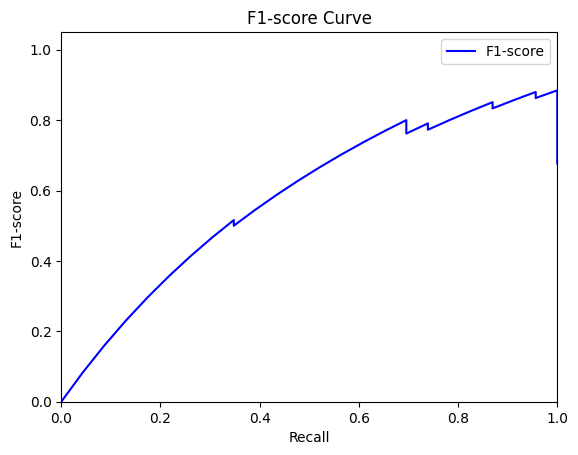

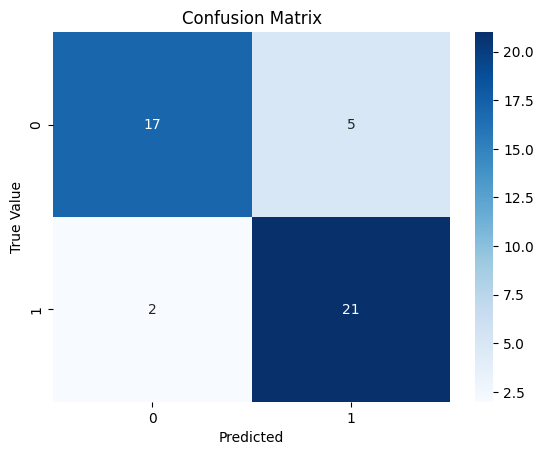

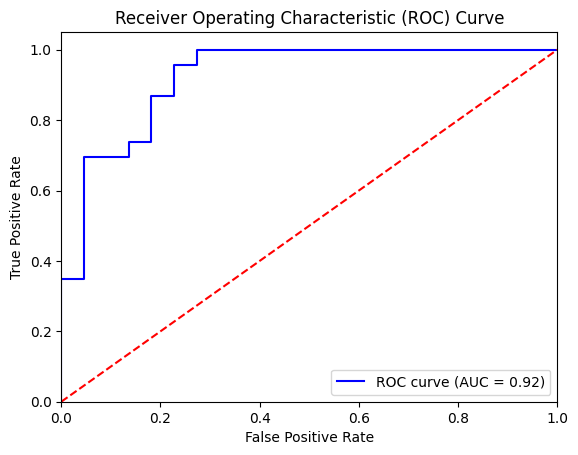

In [51]:
# Model testing and evaluation
y_pred = model_rfc.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



# Plot Precision-Recall curve
y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()


# Calculate confusion matrix
y_pred = model_rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

# Create a heatmap for the confusion matrix
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()



# Calculate ROC curve and AUC
y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

User Input prediction:

In [52]:
# User Input for Prediction
print("Please enter the values for the following features:")
user_input = {}
for feature in X.columns:
    user_input[feature] = float(input(f"{feature}: "))

# Convert user input into DataFrame and predict
user_data = pd.DataFrame(user_input, index=[0])
prediction = model_rfc.predict(user_data)

if prediction[0] == 1:
    print("The model predicts that my team is going to win.")
else:
    print("The model predicts that my team is not going to win.")

Please enter the values for the following features:
Run Scored: 300
Wicket Lost: 5
Fours: 23
Sixes: 12
Extras: 32
Run Rate: 6
Avg Bat Strike Rate: 80
Highest Score: 96
Wicket Taken: 3
Given Extras: 12
Highest Individual wicket: 3
Team_Bangladesh: 1
Team_Hong Kong: 0
Team_India: 0
Team_Pakistan: 0
Team_Srilanka: 0
Team_UAE: 0
Opponent_Bangladesh: 0
Opponent_Hong Kong: 0
Opponent_India: 1
Opponent_Pakistan: 0
Opponent_Sri Lanka: 0
Opponent_Srilanka: 0
Opponent_UAE: 0
Ground_Chandigarh: 0
Ground_Chattogram: 0
Ground_Colombo(PSS): 0
Ground_Colombo(RPS): 0
Ground_Colombo(SSC): 0
Ground_Cuttack: 0
Ground_Dambulla: 0
Ground_Dhaka: 0
Ground_Dubai(DSC): 0
Ground_Fatullah: 0
Ground_Kandy: 0
Ground_Karachi: 0
Ground_Kolkata: 0
Ground_Lahore: 0
Ground_Mirpur: 1
Ground_Moratuwa: 0
Ground_Sharjah: 0
Selection_Bowling: 0
Toss_new: 1
The model predicts that my team is going to win.
